In [26]:
# Shahareyar Hossain
# M.Sc. Bda, Sem:2
# B2230034

In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import numpy  as np
import random

import pandas as pd

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


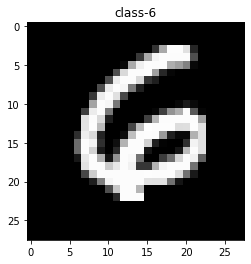

Train image 20317-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 169
  253 253 225  38   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  57 170 245 252
  252 252 252  79   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  10 171 240 253 252 252
  173 158 130   8   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  77 217 252 252 253 161  39
    6   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  78 236 252 252 217  53  31   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  

In [2]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = 'C:/Users/BIDIT/OneDrive/Documents/Machine Learning/Assignments/Assignment-6/'

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])

## DATA PROCESSING

In [3]:
# As there are no parameters in the model, we dont use any validation set.

train_flat = np.array(train_images.reshape(60000, 28*28), dtype = np.float64) # CONVERTING IN DESIRED FORM
#train_flat
np.random.seed(69)
ran = np.random.choice(range(60000), 60000, replace = False) # GENERATING RANDOM INDICES FOR SHUFFLING
#ran
train_df = train_flat[ran] # SHUFFLING USING RANDOM INDICES : FANCY INDEXING
train_labels = train_labels[ran]


print(train_df.shape)

(60000, 784)


## Model

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))



def fit(X,y,learning_rate,no_of_iter):
    lr =learning_rate
    n_iter = no_of_iter
    n_samples,n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    
    for i in range(n_iter):
        linear_pred = np.dot(X,weights) + bias
        predictions =sigmoid(linear_pred)
        
        dw = (1/n_samples)*np.dot(X.T, (predictions - y))
        db = (1/n_samples)*np.sum(predictions - y)
        
        weights = weights -lr*dw
        bias = bias - lr*db
    #print(predictions)
    return weights, bias     


def predictions(X, weights, bias):
    X_flat = X.reshape(X.shape[0], -1)
    linear_pred = np.dot(X_flat,weights) + bias
    y_pred = sigmoid(linear_pred)
    
    #class_pred = [0 if y <= 0.5 else 1 for y in y_pred ]
    #return class_pred
    return y_pred


def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test)/len(y_test)

In [5]:
# As there are 10 classes, we train 10 classifiers.
# like: 1(=x) vs 0(=all except x) for x = 0 to 9.
# appending predictions to a list
Pred= []
for _ in range(10):
    w, b = fit(train_df/255, np.array([1 if lab == _ else 0 for lab in train_labels]),0.1,1000) # scaling the values btw 0&1
    y_pred = predictions(test_images/255,w,b) ## scaling the values btw 0&1
    Pred.append(y_pred)

In [6]:
# Converting the list to a 2D array
Predictions = np.array(Pred)

In [7]:
# The Max prob gives us the predicted class level
predicted_labels = np.argmax(Predictions, axis = 0)

In [8]:
# Predicted class labels
predicted_labels

array([7, 2, 1, ..., 4, 8, 6], dtype=int64)

In [9]:
# Model Accuracy
accuracy(predicted_labels, test_labels)

0.9014

## Confusion Matrix 

In [10]:
# Confusion Matrix

con_mat = np.array(np.zeros(100),dtype= np.int32).reshape(10,10)
for i,j in zip(test_labels, predicted_labels):
    con_mat[i,j] += 1
con_mat_df = pd.DataFrame(con_mat)
print('Confusion Matrix\nActual vs Predicted');
print(con_mat_df);
print('\n')

# Accuracy
print('Accuracy is:')
print(np.trace(con_mat_df)/10000)


Confusion Matrix
Actual vs Predicted
     0     1    2    3    4    5    6    7    8    9
0  961     0    2    2    1    0    7    1    6    0
1    0  1100    2    3    1    1    4    2   22    0
2    8    12  885   20   14    0   17   16   51    9
3    6     1   20  904    1   26    5   15   21   11
4    1     3    6    1  899    1   10    1   11   49
5   18     6    5   48   17  712   20   10   43   13
6   12     3    4    3    8   15  906    1    6    0
7    3    18   28    5    9    0    2  925    2   36
8   11    10    8   21    8   23   13   15  855   10
9   11     8    8   15   45   11    0   33   11  867


Accuracy is:
0.9014
